# Estimating an affine transformation between points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos,sin

## Affine transformation

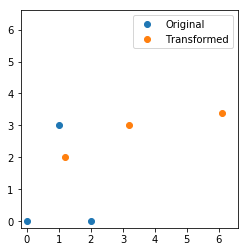

In [2]:
def get_affine_matrix():
    Ta = np.array([[1.0, 1.3, 1.2],
                   [0.5, 0.3, 2.0],
                   [ 0.,  0., 1.]])
    return Ta

# Array containing three poins. Each point is a column of the array.
points = np.array([[0., 2., 1.],
                   [0., 0., 3.],
                   [1., 1., 1.]])

Ta = get_affine_matrix()
points_a = np.dot(Ta, points)

plt.subplot(111, aspect='equal')
plt.plot(points[0], points[1], 'o')
plt.plot(points_a[0], points_a[1], 'o')
plt.xlim((-0.2, 6.6))
_ = plt.ylim((-0.2, 6.6))
plt.legend(('Original', 'Transformed'))

## Recover the affine transformation matrix from the points

Estimated affine transformation: 
[[1.  1.3 1.2]
 [0.5 0.3 2. ]
 [0.  0.  1. ]]


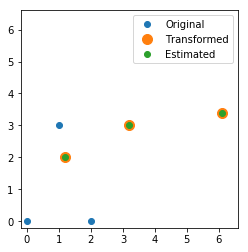

In [3]:
def get_pseudoinverse(points_x, points_y):
    
    mat_p = np.linalg.inv(np.dot(points_x, points_x.T))
    pseudoinverse_mat = np.dot(np.dot(points_y, points_x.T), mat_p)
    
    return pseudoinverse_mat

Ta_est = get_pseudoinverse(points, points_a)
print("Estimated affine transformation: \n{}".format(np.round(Ta_est, 2)))

# Apply the transformation
points_a_est = np.dot(Ta_est, points)

plt.subplot(111, aspect='equal')
plt.plot(points[0], points[1], 'o')                # Original points
plt.plot(points_a[0], points_a[1], 'o', ms=10)     # Points transformed using the given transformation matrix
plt.plot(points_a_est[0], points_a_est[1], 'o')    # Points transformed using the estimated transformation matrix
plt.xlim((-0.2, 6.6))
_ = plt.ylim((-0.2, 6.6))
plt.legend(('Original', 'Transformed','Estimated'))

## Estimating the affine transformation from 4 points

We will estimate the affine transformation that maps from a set of 4 points to another set of 4 points. If the 4 points are related by an affine transformation, the estimated matrix will be exact. Otherwise, the estimated transformation will be the best in the least squares sense.

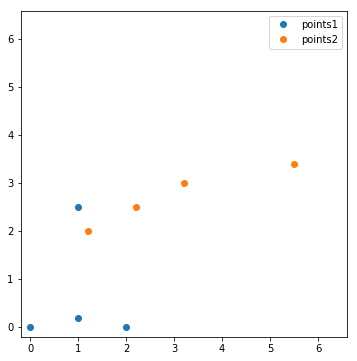

In [4]:
points1 = np.array([[0., 2., 1., 1.],
                    [0., 0., 2.5, 0.2],
                    [1., 1., 1., 1.]])
points2 = np.array([[1.2, 3.2, 5.5, 2.2],
                    [2. , 3. , 3.4, 2.5],
                    [1. , 1. , 1. , 1. ]])

plt.figure(figsize=[12,6])
plt.subplot(111, aspect='equal')
plt.plot(points1[0], points1[1], 'o')
plt.plot(points2[0], points2[1], 'o')
plt.xlim((-0.2, 6.6))
plt.ylim((-0.2, 6.6))
plt.legend(('points1', 'points2'))

Estimated transformation: 
[[1.    1.348 1.115]
 [0.5   0.368 1.977]
 [0.    0.    1.   ]]


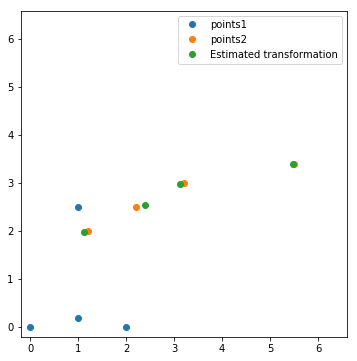

In [5]:
Ta_est = get_pseudoinverse(points1, points2)
points_est = np.dot(Ta_est, points1)

plt.figure(figsize=[12,6])
plt.subplot(111, aspect='equal')
plt.plot(points1[0], points1[1], 'o')
plt.plot(points2[0], points2[1], 'o')
plt.plot(points_est[0], points_est[1], 'o')
plt.xlim((-0.2, 6.6))
plt.ylim((-0.2, 6.6))
plt.legend(('points1', 'points2', 'Estimated transformation'))
print("Estimated transformation: \n{}".format(np.round(Ta_est, 3)))